In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Embedding , Dropout, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils


warnings.filterwarnings('ignore')

In [2]:
text = open('train 100,000.txt').read().splitlines()
df_train = pd.DataFrame()
df_train['text'] = text

In [3]:
df_train['text'].values

array(['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
       '__label__2 Am

In [6]:
df_train

,text
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."
...,...
99995,__label__2 Good: very good excelent fantastic ...
99996,__label__1 THE REAL SUPERMAN: THESE ARE THE RE...
99997,__label__1 It gets one star because zero was n...
99998,__label__1 Don't Spend Your Money: I think I n...


In [7]:
import pandas as pd





# Initialize lists to hold texts and labels
x_train = []
labels_train = []

# Process each line
for line in text:
    if line.startswith('__label__1'):
        labels_train.append(0)
        x_train.append(line[len('__label__1 '):])
    elif line.startswith('__label__2'):
        labels_train.append(1)
        x_train.append(line[len('__label__2 '):])

# Create a DataFrame
df_train = pd.DataFrame({'text': x_train, 'label': labels_train})

# Display the DataFrame
print(df_train)


                                                    text  label
0      Stuning even for the non-gamer: This sound tra...      1
1      The best soundtrack ever to anything.: I'm rea...      1
2      Amazing!: This soundtrack is my favorite music...      1
3      Excellent Soundtrack: I truly like this soundt...      1
4      Remember, Pull Your Jaw Off The Floor After He...      1
...                                                  ...    ...
99995  Good: very good excelent fantastic wonderful m...      1
99996  THE REAL SUPERMAN: THESE ARE THE REAL ADVENTUR...      0
99997  It gets one star because zero was not an optio...      0
99998  Don't Spend Your Money: I think I now know mor...      0
99999  Enough already: This is what you call "overkil...      0

[100000 rows x 2 columns]


##### &&&&&&&&&&&&&&&&&&&&&

In [8]:
test = open('test 20,000.txt').read().splitlines()
df_test = pd.DataFrame()
df_test['test'] = test

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test)

In [10]:


# Initialize lists to hold texts and labels
x_test = []
labels_test = []

# Process each line
for line in test:
    if line.startswith('__label__1'):
        labels_test.append(0)
        x_test.append(line[len('__label__1 '):])
    elif line.startswith('__label__2'):
        labels_test.append(1)
        x_test.append(line[len('__label__2 '):])
df_test = pd.DataFrame({'text': x_test, 'label': labels_test})

# Display the DataFrame
print(df_test)
        

                                                   text  label
0     Great CD: My lovely Pat has one of the GREAT v...      1
1     One of the best game music soundtracks - for a...      1
2     Batteries died within a year ...: I bought thi...      0
3     works fine, but Maha Energy is better: Check o...      1
4     Great for the non-audiophile: Reviewed quite a...      1
...                                                 ...    ...
9995  Really Enjoyed it!: This was a wonderful read ...      1
9996  Disappointing PC interface/software: The devic...      0
9997  Love it Love it Love it: My daughter loves thi...      1
9998  Faulty leg causing distress for my baby: I pur...      0
9999  Fantastic Entertainer: My daughter started enj...      1

[10000 rows x 2 columns]


In [12]:
y_train = utils.to_categorical(df_train['label'] , num_classes=2)
y_test = utils.to_categorical(df_test['label'] , num_classes=2)

In [13]:
labels = labels_train + labels_test

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])

In [15]:
x_train = tokenizer.texts_to_sequences(df_train['text'])
x_test = tokenizer.texts_to_sequences(df_test['text'])

# max_len = max([len(seq) for seq in sequences])
max_len = 200

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [18]:

vocab_size = len(tokenizer.word_index)+1
vocab_size

121537

In [19]:
model = Sequential()
model.add(Input(shape= (max_len,)))
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128, return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(2 , activation= 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 100)       │    12,153,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 200, 128)       │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,402,790 (47.31 MB)

 Trainable params: 12,402,790 (47.31 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4)

Epoch 1/4
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 483s 154ms/step - accuracy: 0.8293 - loss: 0.3756
Epoch 2/4
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 478s 153ms/step - accuracy: 0.9450 - loss: 0.1526
Epoch 3/4
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 509s 163ms/step - accuracy: 0.9672 - loss: 0.0956
Epoch 4/4
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 515s 165ms/step - accuracy: 0.9803 - loss: 0.0605


In [21]:
preds = model.predict(x_test)
PREDS = (preds > 0.5).astype(int).flatten()

PREDS

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


array([0, 1, 0, ..., 0, 0, 1])

In [22]:
unique_values, counts = np.unique(PREDS, return_counts=True)
value_counts = dict(zip(unique_values, counts))

print(f'0 Counts: {value_counts[0]}.')
print(f'1 Counts: {value_counts[1]}.')

0 Counts: 9988.
1 Counts: 10012.


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      4875
           1       0.87      0.95      0.91      5125

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



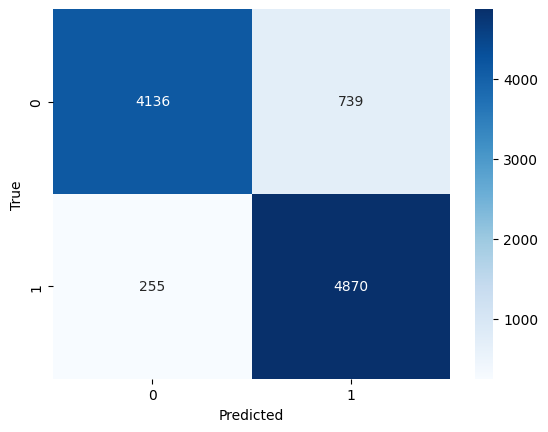

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded y_test and y_pred to single class labels
y_test_single_label = np.argmax(y_test, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test_single_label, y_pred_single_label))

# Compute confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_single_label)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Results Analysis:

Performance: The model shows reasonable accuracy in sentiment classification but has room for improvement.

Class Imbalance: The counts of predicted labels indicate potential class imbalance.

Misclassifications: Some tweets are misclassified, as shown by the confusion matrix.

Improvements: Consider data augmentation, class weighting, and tuning the model for better results.





